# PREDICTING TYPE OF PRECIPITATION DATA SCIENCE PROJECT

In [2]:
import pandas as pd

In [3]:
path = r"C:\Users\moeez\Desktop\data science\Datasets\seattle weather.csv"
url= "https://www.kaggle.com/datasets/ananthr1/weather-prediction?select=seattle-weather.csv"  # how to directly get csv from url
weather_df = pd.read_csv(path)

weather_df.head(3)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain


In [4]:
weather_df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [50]:
# convert quantitative into qulitative only if need to use as a predictor
# purpose of datascience is not to apply as many libraries and functions as you know, must actually know why doing something

# print( weather_df["weather"].unique() )

#df = pd.get_dummies(weather_df["weather"])

#w_df = pd.concat([weather_df, df],axis=1)    # ignore_index=True if concate df along rows instead of columns

#print(w_df.tail(3))

#w_df.to_csv("seattle weather.csv")

In [5]:
x = weather_df.drop(["date","weather"],axis=1)  # axis=1 tells to move along columns
y = weather_df["weather"]

weather_df["weather"].size   # no. of samples/ observations

1461

In [7]:
# normalizing X
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)
print(x_scaled)
print(x_scaled.size) # all entries in array

[[-0.45364986 -0.49529914 -0.64421175  1.01497975]
 [ 1.17859791 -0.79473121 -1.08234662  0.87583314]
 [-0.33385186 -0.64501518 -0.20607688 -0.65477956]
 ...
 [-0.45364986 -1.25748987 -1.52048149 -0.44605965]
 [-0.45364986 -1.47525865 -1.83912504  0.11052679]
 [-0.45364986 -1.47525865 -2.05819247  0.18010009]]
5844


In [8]:
# as outcome/target can be classified as distinct values (i.e. not a continuous value)
# logistic regression will be used

# train test split
from sklearn.model_selection import train_test_split
xs_train, xs_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

# applying model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class= "multinomial", solver= "lbfgs", max_iter= 1500)
model.fit(xs_train, y_train)

LogisticRegression(max_iter=1500, multi_class='multinomial')

In [9]:
# why not repeat above cell(train test split, regression) again to get yhat2 and use it with yhat 1 to get mean in order to get yhat mean and use that for accuracy???
# can't take average of the target value/ predicted value here

# model developed on the training set applied to the testing set
yhat = model.predict(xs_test)

accuracy: 0.76


d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.00      0.00      0.00        35
        rain       0.85      0.84      0.85       194
        snow       0.00      0.00      0.00         8
         sun       0.69      0.92      0.79       187

    accuracy                           0.76       439
   macro avg       0.31      0.35      0.33       439
weighted avg       0.67      0.76      0.71       439



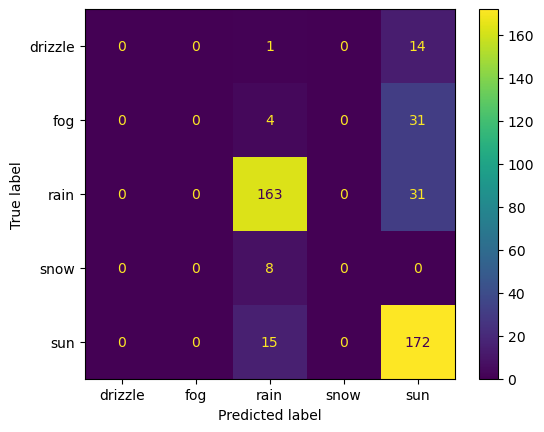

In [10]:
# assessing out-of-sample performance of model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yhat)
print(f"accuracy: {accuracy:.2f}")           # just accuracy not enough especially when sample size(rain and sun vs rest) imbalance exists, use classification report

# assessing out-of-sample performance of model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,yhat)

labels = model.classes_         # gets name of variables from model/ fit created(model saved in variable model, variable name of models in sklearn saved in .classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=labels)
cm_display.plot()

# WHY TOTAL OBSERVATION NOT 1461?
# 1461*0.3 = 438   # only the test set used in confusion matrix
# 163+172+15+8+4+1+31+31+14 = 439

# assessing out-of-sample performance of model

from sklearn.metrics import classification_report
print (classification_report(y_test,yhat))

# understand clssificTION report better
# indicated better model needed as apart from rain and sun, only 30% accurate
# so classification report very useful when class/sample size imbalance
# get rid of the clssification report error?
# is the macro avg result so low bc of these errors? why so low?

In [ ]:
# make the fit/ model more acuurate/ maximum likelihood/ refinement
#             ??????????????????????????????????????
#            hyperparameters for logistic regression

# Model: Random Forest Classifier

accuracy: 0.81
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        15
         fog       0.13      0.06      0.08        35
        rain       0.95      0.93      0.94       194
        snow       1.00      0.25      0.40         8
         sun       0.76      0.91      0.83       187

    accuracy                           0.81       439
   macro avg       0.57      0.43      0.45       439
weighted avg       0.77      0.81      0.78       439



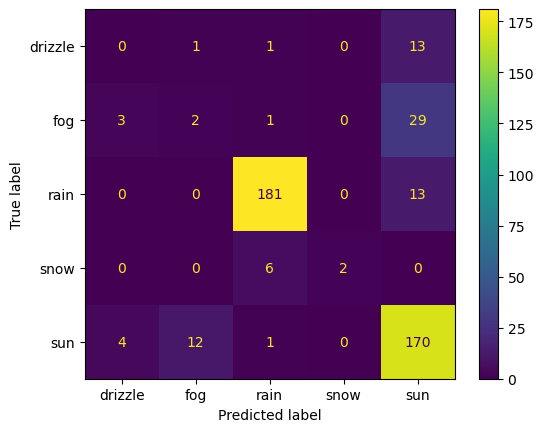

In [11]:
# using random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(xs_train, y_train)

yhat_rf = rf_model.predict(xs_test)

# assessing out-of-sample performance of model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yhat_rf)
print(f"accuracy: {accuracy:.2f}")           # just accuracy not enough especially when sample size(rain and sun vs rest) imbalance exists, use classification report

# assessing out-of-sample performance of model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,yhat_rf)

labels = model.classes_         # gets name of variables from model/ fit created(model saved in variable model, variable name of models in sklearn saved in .classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=labels)
cm_display.plot()

# assessing out-of-sample performance of model

from sklearn.metrics import classification_report
print (classification_report(y_test,yhat_rf))


In [ ]:
# random forest classifier predicts weather condition better than logistic regression
# its a better model as apart from rain and sun, accuracy increased from 30% to 50%
# but can there still be a better model?